# Window selection of the pseudo WV and the adaptive algorithm

In [3]:
using Winston;
using Color;
using Distributions
import DSP

In [4]:
include("../juwvid.jl")

juwvid

## Window Size dependence of the Pseudo Wigner Ville Distribution

### generating the signal with the nonlinear IF

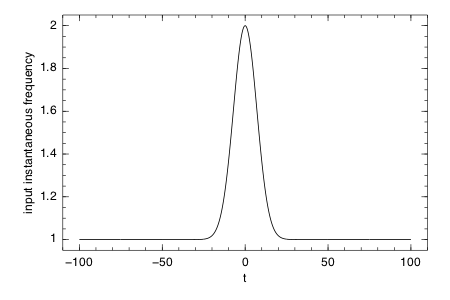

In [5]:
nsample=1024
x=collect(linspace(-100,100,nsample));
ifreq=exp(-(x.*x)/100) + 1;
Winston.plot(x,ifreq)
Winston.xlabel("t")
Winston.ylabel("input instantaneous frequency")

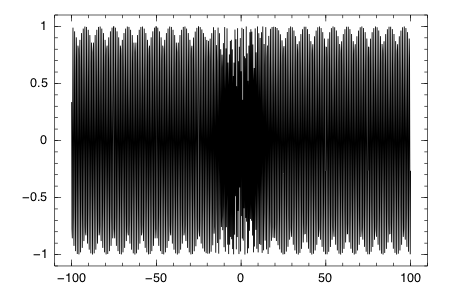

In [7]:
iw=2*pi*ifreq;
phase=cumsum(iw)/nsample*(x[end]-x[1]);
y=cos(phase);
Winston.plot(x,y)

In [39]:
z=DSP.Util.hilbert(y);
tfrp4=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"mean",4);
indf4=extif.maxif(abs(tfrp4));
fn4=juwutils.index_to_frequency(indf4, NaN, x[2]-x[1],nsample);

tfrp8=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"mean",8);
indf8=extif.maxif(abs(tfrp8));
fn8=juwutils.index_to_frequency(indf8, NaN, x[2]-x[1],nsample);

tfrp16=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"mean",16);
indf16=extif.maxif(abs(tfrp16));
fn16=juwutils.index_to_frequency(indf16, NaN, x[2]-x[1],nsample);

tfrp32=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"mean",32);
indf32=extif.maxif(abs(tfrp32));
fn32=juwutils.index_to_frequency(indf32, NaN, x[2]-x[1],nsample);

Single pseudo Wigner Ville
Use fft.
Single pseudo Wigner Ville
Use fft.
Single pseudo Wigner Ville
Use fft.
Single pseudo Wigner Ville
Use fft.


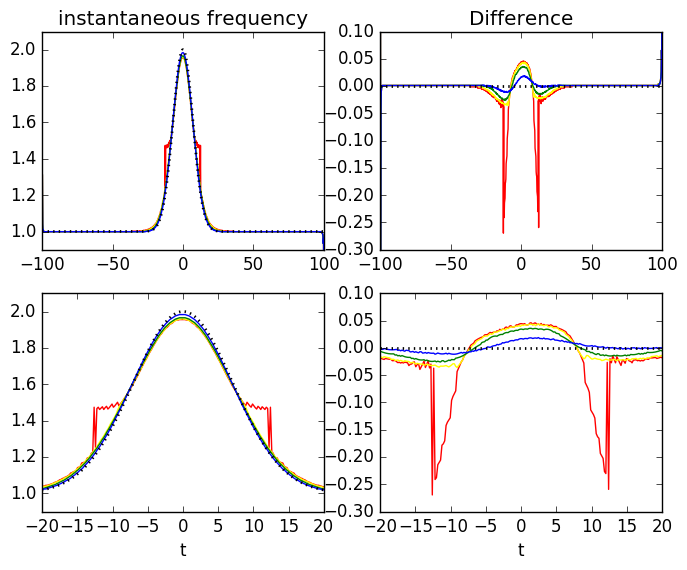

PyObject <matplotlib.text.Text object at 0x32b868490>

In [58]:
fig=PyPlot.figure()
ax = fig[:add_subplot](2,2,1)
PyPlot.plot(x,fn4,color="red")
PyPlot.plot(x,fn8,color="yellow")
PyPlot.plot(x,fn16,color="green")
PyPlot.plot(x,fn32,color="blue")
PyPlot.plot(x,ifreq,lw=2,ls="dotted",color="black")
PyPlot.ylim(0.9,2.1)
PyPlot.title("instantaneous frequency")
ax = fig[:add_subplot](2,2,2)
PyPlot.plot(x,ifreq-fn4,color="red")
PyPlot.plot(x,ifreq-fn8,color="yellow")
PyPlot.plot(x,ifreq-fn16,color="green")
PyPlot.plot(x,ifreq-fn32,color="blue")
PyPlot.plot(x,ifreq-ifreq,lw=2,ls="dotted",color="black")
PyPlot.ylim(-0.3,0.1)
PyPlot.title("Difference")
ax = fig[:add_subplot](2,2,3)
PyPlot.plot(x,fn4,color="red")
PyPlot.plot(x,fn8,color="yellow")
PyPlot.plot(x,fn16,color="green")
PyPlot.plot(x,fn32,color="blue")
PyPlot.plot(x,ifreq,lw=2,ls="dotted",color="black")
PyPlot.ylim(0.9,2.1)
PyPlot.xlim(-20.0,20.0)
PyPlot.xlabel("t")
ax = fig[:add_subplot](2,2,4)
PyPlot.plot(x,ifreq-fn4,color="red")
PyPlot.plot(x,ifreq-fn8,color="yellow")
PyPlot.plot(x,ifreq-fn16,color="green")
PyPlot.plot(x,ifreq-fn32,color="blue")
PyPlot.plot(x,ifreq-ifreq,lw=2,ls="dotted",color="black")
PyPlot.ylim(-0.3,0.1)
PyPlot.xlim(-20.0,20.0)
PyPlot.xlabel("t")

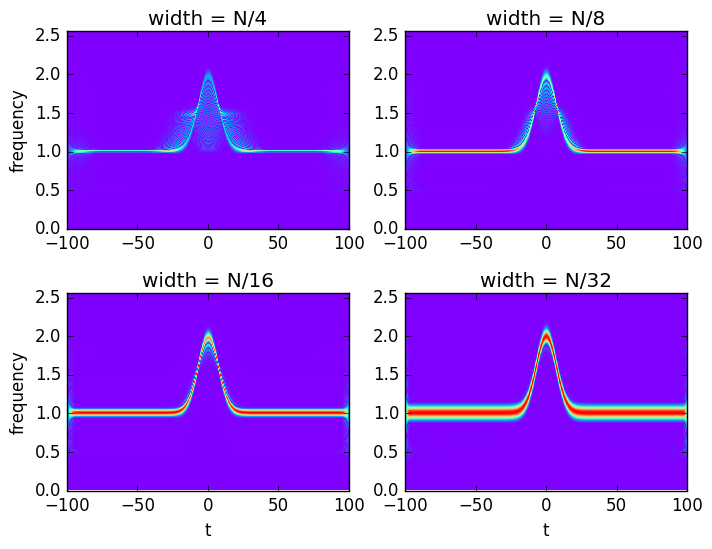

PyObject <matplotlib.text.Text object at 0x328460d10>

In [61]:
# Figure 3
fig=PyPlot.figure()
ax = fig[:add_subplot](2,2,1)
a=juwplot.tfrshow(abs(tfrp4),x[2]-x[1],x[1],x[end],NaN,NaN,0.7,"rainbow")
PyPlot.ylabel("frequency")
PyPlot.title("width = N/4")
ax = fig[:add_subplot](2,2,2)
a=juwplot.tfrshow(abs(tfrp8),x[2]-x[1],x[1],x[end],NaN,NaN,0.7,"rainbow")
PyPlot.title("width = N/8")
ax = fig[:add_subplot](2,2,3)
a=juwplot.tfrshow(abs(tfrp16),x[2]-x[1],x[1],x[end],NaN,NaN,0.7,"rainbow")
PyPlot.xlabel("t")
PyPlot.ylabel("frequency")
PyPlot.title("width = N/16")
ax = fig[:add_subplot](2,2,4)
a=juwplot.tfrshow(abs(tfrp32),x[2]-x[1],x[1],x[end],NaN,NaN,0.7,"rainbow")
PyPlot.xlabel("t")
PyPlot.title("width = N/32")

### ADDING Gaussian noises

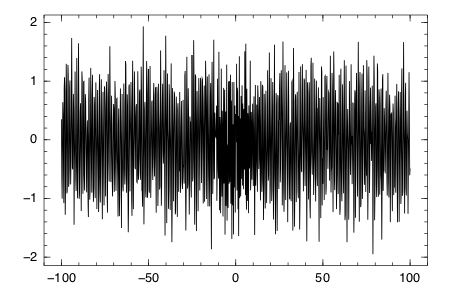

In [8]:
using Distributions
d = Normal()
ynoise=y+rand(d,nsample)*std(y)*0.5
Winston.plot(x,ynoise)

In [77]:
z=DSP.Util.hilbert(ynoise);
tfrp4=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"mean",4);
indf4=extif.maxif(abs(tfrp4));
fn4=juwutils.index_to_frequency(indf4, NaN, x[2]-x[1],nsample);

tfrp8=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"mean",8);
indf8=extif.maxif(abs(tfrp8));
fn8=juwutils.index_to_frequency(indf8, NaN, x[2]-x[1],nsample);

tfrp16=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"mean",16);
indf16=extif.maxif(abs(tfrp16));
fn16=juwutils.index_to_frequency(indf16, NaN, x[2]-x[1],nsample);

tfrp32=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"mean",32);
indf32=extif.maxif(abs(tfrp32));
fn32=juwutils.index_to_frequency(indf32, NaN, x[2]-x[1],nsample);

Single pseudo Wigner Ville
Use fft.
Single pseudo Wigner Ville
Use fft.
Single pseudo Wigner Ville
Use fft.
Single pseudo Wigner Ville
Use fft.


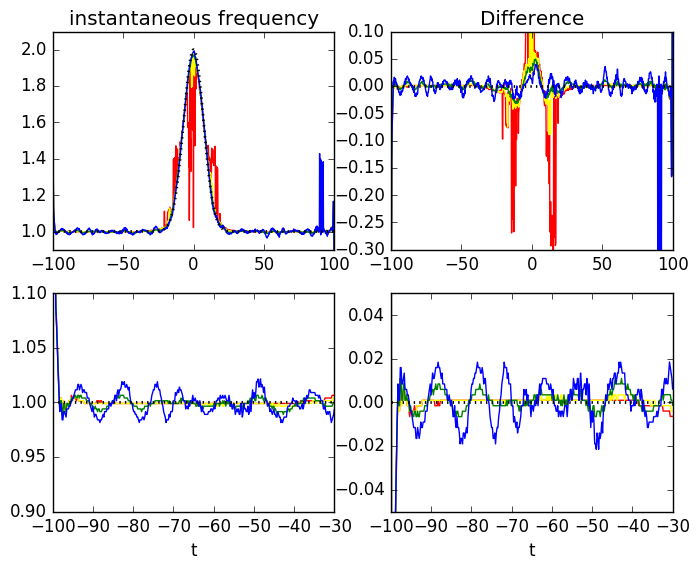

PyObject <matplotlib.text.Text object at 0x341625410>

In [81]:
fig=PyPlot.figure()
ax = fig[:add_subplot](2,2,1)
PyPlot.plot(x,fn4,color="red")
PyPlot.plot(x,fn8,color="yellow")
PyPlot.plot(x,fn16,color="green")
PyPlot.plot(x,fn32,color="blue")
PyPlot.plot(x,ifreq,lw=2,ls="dotted",color="black")
PyPlot.ylim(0.9,2.1)
PyPlot.title("instantaneous frequency")
ax = fig[:add_subplot](2,2,2)
PyPlot.plot(x,ifreq-fn4,color="red")
PyPlot.plot(x,ifreq-fn8,color="yellow")
PyPlot.plot(x,ifreq-fn16,color="green")
PyPlot.plot(x,ifreq-fn32,color="blue")
PyPlot.plot(x,ifreq-ifreq,lw=2,ls="dotted",color="black")
PyPlot.ylim(-0.3,0.1)
PyPlot.title("Difference")
ax = fig[:add_subplot](2,2,3)
PyPlot.plot(x,fn4,color="red")
PyPlot.plot(x,fn8,color="yellow")
PyPlot.plot(x,fn16,color="green")
PyPlot.plot(x,fn32,color="blue")
PyPlot.plot(x,ifreq,lw=2,ls="dotted",color="black")
PyPlot.ylim(0.9,1.1)
PyPlot.xlim(-100.0,-30.0)
PyPlot.xlabel("t")
ax = fig[:add_subplot](2,2,4)
PyPlot.plot(x,ifreq-fn4,color="red")
PyPlot.plot(x,ifreq-fn8,color="yellow")
PyPlot.plot(x,ifreq-fn16,color="green")
PyPlot.plot(x,ifreq-fn32,color="blue")
PyPlot.plot(x,ifreq-ifreq,lw=2,ls="dotted",color="black")
PyPlot.ylim(-0.05,0.05)
PyPlot.xlim(-100.0,-30.0)
PyPlot.xlabel("t")

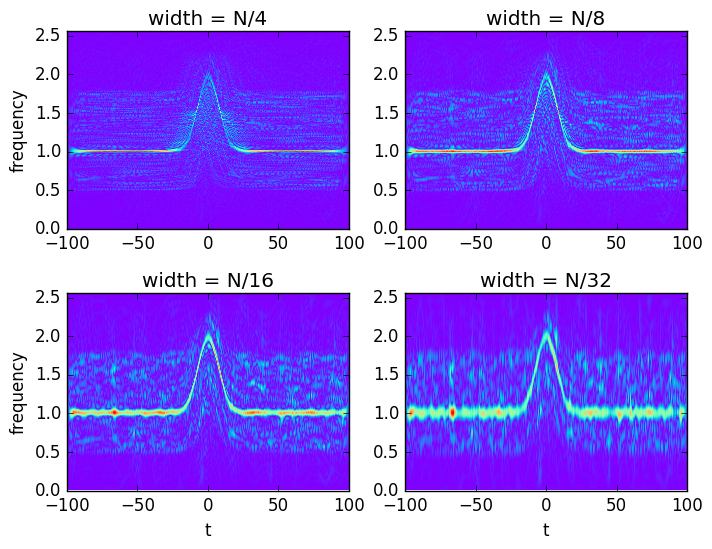

PyObject <matplotlib.text.Text object at 0x322733750>

In [82]:
fig=PyPlot.figure()
ax = fig[:add_subplot](2,2,1)
a=juwplot.tfrshow(abs(tfrp4),x[2]-x[1],x[1],x[end],NaN,NaN,0.7,"rainbow")
PyPlot.ylabel("frequency")
PyPlot.title("width = N/4")
ax = fig[:add_subplot](2,2,2)
a=juwplot.tfrshow(abs(tfrp8),x[2]-x[1],x[1],x[end],NaN,NaN,0.7,"rainbow")
PyPlot.title("width = N/8")
ax = fig[:add_subplot](2,2,3)
a=juwplot.tfrshow(abs(tfrp16),x[2]-x[1],x[1],x[end],NaN,NaN,0.7,"rainbow")
PyPlot.xlabel("t")
PyPlot.ylabel("frequency")
PyPlot.title("width = N/16")
ax = fig[:add_subplot](2,2,4)
a=juwplot.tfrshow(abs(tfrp32),x[2]-x[1],x[1],x[end],NaN,NaN,0.7,"rainbow")
PyPlot.xlabel("t")
PyPlot.title("width = N/32")

## An adaptive algorithm of pseudo Wigner-Ville Distribution

#### This sample aims to reproduce Figure 5.3 of the book "Time-frequency signal analysis with applications" by Stankovic, Dakovic, and Thayaparan. 


#### Generating sample data with Gaussian noise

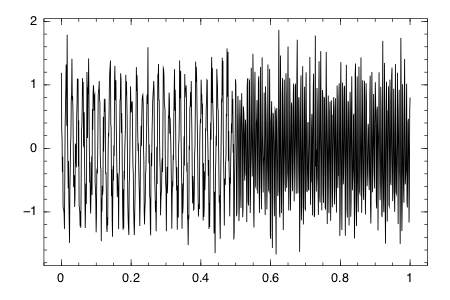

In [4]:
nsample=1024
x,z,iw,ynorm=sampledata.genstepfm(nsample);
d = Normal()
ynoise=real(z)+rand(d,nsample)/3.16
nsample=length(x);dx=x[2]-x[1]
plot(x,ynoise)

#### Input Instantaneous Frequency 

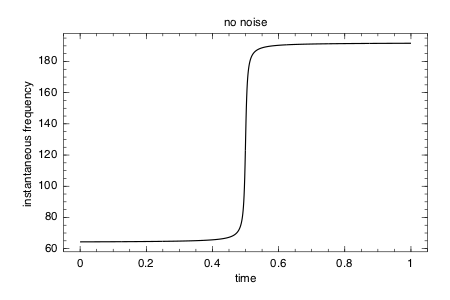

In [5]:
p = FramedPlot(title="no noise",xlabel="time",ylabel="instantaneous frequency",);
add(p, Curve(x,iw/(2*pi),width=3))

### Wigner Ville Distribution 

Single Wigner Ville


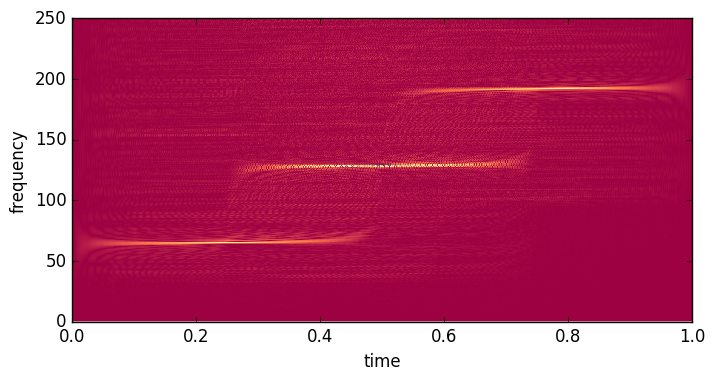

(0,250)

Use fft.


In [14]:
### one can see large artifact in the middle of time.
z=DSP.Util.hilbert(ynoise);
tfr=cohenclass.tfrwv(z);
indfwv=extif.maxif(abs(tfr));

fig=PyPlot.figure()
a=juwplot.tfrshow(abs(tfr),dx,x[1],x[end],NaN,NaN,1.0,"Spectral")
PyPlot.xlabel("time")
PyPlot.ylabel("frequency")
PyPlot.ylim(0,250)

### The Pseudo Wigner Ville with N/4 window and N/16
- you can see a smoothing effect for a narrow width

Single pseudo Wigner Ville


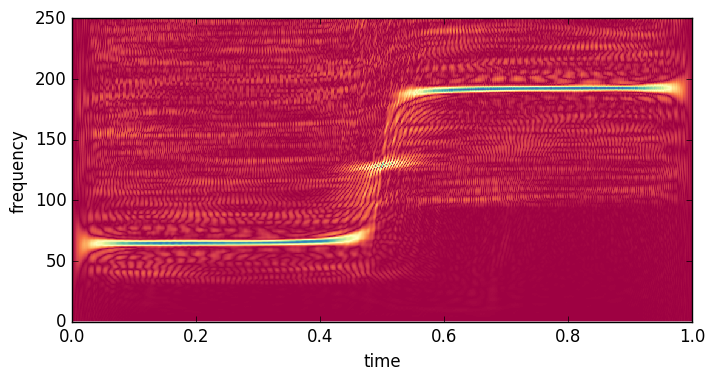

(0,250)

Use fft.


In [15]:
# window size=256 (default window size of tfrpwv=N/4 )
tfrp=cohenclass.tfrpwv(z)
indfpwv256=extif.maxif(abs(tfrp))
fig=PyPlot.figure()
a=juwplot.tfrshow(abs(tfrp),dx,x[1],x[end],NaN,NaN,1.0,"Spectral")
PyPlot.xlabel("time")
PyPlot.ylabel("frequency")
PyPlot.ylim(0,250)

Single pseudo Wigner Ville


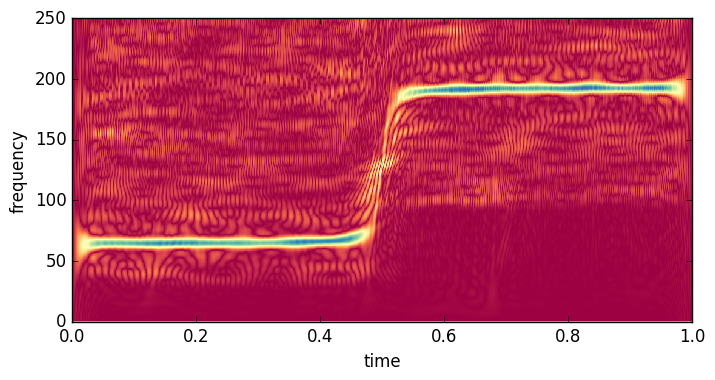

(0,250)

Use fft.


In [17]:
# window size=N/8 
tfrp=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"mean",8)
indfpwv128=extif.maxif(abs(tfrp))
fig=PyPlot.figure()
a=juwplot.tfrshow(abs(tfrp),dx,x[1],x[end],NaN,NaN,1.0,"Spectral")
PyPlot.xlabel("time")
PyPlot.ylabel("frequency")
PyPlot.ylim(0,250)

Single pseudo Wigner Ville


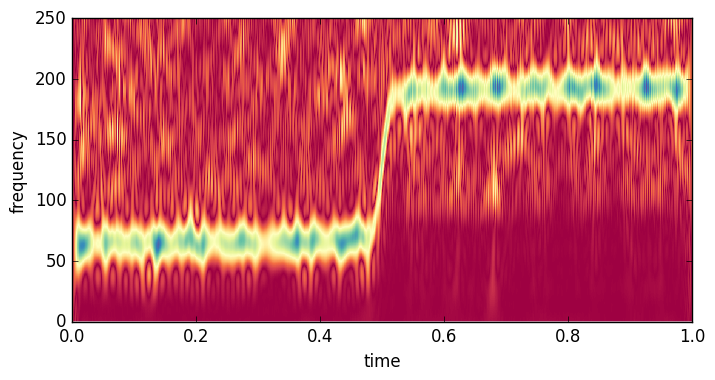

(0,250)

Use fft.


In [18]:
# window size = N/32
tfrp=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0,"mean",32)
indfpwv32=extif.maxif(abs(tfrp))
fig=PyPlot.figure()
a=juwplot.tfrshow(abs(tfrp),dx,x[1],x[end],NaN,NaN,1.0,"Spectral")
PyPlot.xlabel("time")
PyPlot.ylabel("frequency")
PyPlot.ylim(0,250)

- In summary, there is a trade-off relation. The larger window size exhibits more artifact and finer resolution.  The small window size exhibits less artifact and poor resolution.    

### Then, the adaptive window solves the trade-off

In [19]:
fin=collect(linspace(1,512,1024));
varrat=ones(length(x))./(3.16*3.16);

In [20]:
### kappa=2.0, delta kappa=0.39, 
### ndiv_static_crit=4 i.e. accept the criterion if delta frequency < nsample/4
### use Hamming window

tfra,windows=pwvaw.awpwv(z,varrat,NaN,NaN,fin,NaN,2.0,0.39,4,"Hamming");

Single pseudo Wigner Ville with the Adaptive Algorithm


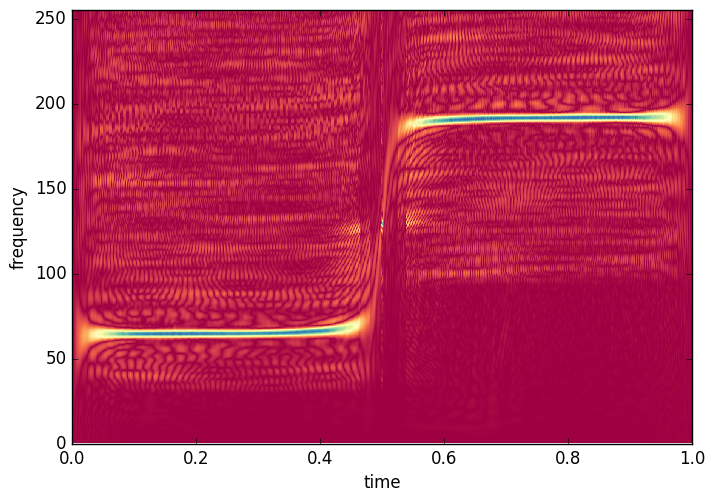

PyObject <matplotlib.text.Text object at 0x31edd8f50>

In [22]:
fig=PyPlot.figure()
a=juwplot.tfrshow(abs(tfra),dx,x[1],x[end],fin[1],fin[end],0.7,"Spectral")
PyPlot.xlabel("time")
PyPlot.ylabel("frequency")

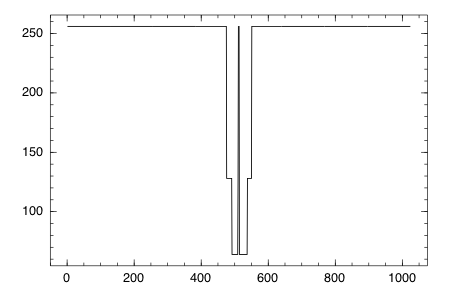

In [23]:
plot(collect(1:length(windows)),map(Float64,windows))

In [24]:
indfn=extif.maxif(abs(tfra));
fx=juwutils.index_to_frequency(indfn, fin, dx,nsample);

### Comparison between WV, PWV (fixed window=256 and 32), and  PWV (adaptive)
- red is input
- yellow (WV), green (pseudo WV, large window),orange  (pseudo WV, small window)
- blue (adaptive, pseudo WV) 

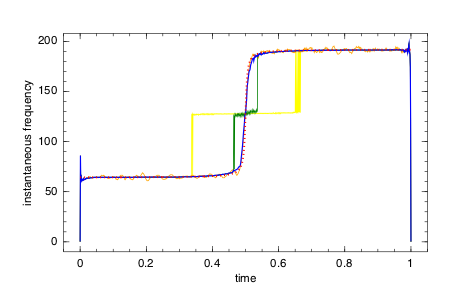

In [26]:
fwv=juwutils.index_to_frequency(indfwv,NaN, dx,nsample);
fwv32=juwutils.index_to_frequency(indfpwv32,NaN, dx,nsample);
fwv256=juwutils.index_to_frequency(indfpwv256,NaN, dx,nsample);
p = FramedPlot(title="",xlabel="time",ylabel="instantaneous frequency",);

add(p, Curve(x,fwv,color="yellow"))
add(p, Curve(x,fwv32,color="orange"))
add(p, Curve(x,fwv256,color="green"))
add(p, Curve(x,fx,color="blue",width=3))
add(p,Curve(x,abs(iw/(2*pi)),color="red",width=5, kind="dotted"))